In [4]:
#1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。
import pandas as pd

# 读取CSV文件
data = pd.read_csv('open_rank_20236.csv')

# 取前一百个项目
top_100_us_data = data.head(100)

# 计算value列的最大值、最小值、均值和中位数
max_value = top_100_us_data['value'].max()
min_value = top_100_us_data['value'].min()
mean_value = top_100_us_data['value'].mean()
median_value = top_100_us_data['value'].median()

print("最大值：", max_value)
print("最小值：", min_value)
print("均值：", mean_value)
print("中位数：", median_value)

最大值： 1394.45
最小值： 200.68
均值： 346.9679
中位数： 273.66999999999996


In [8]:
#2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。
import pandas as pd

# 读取CSV文件，根据实际情况修改文件路径和文件名
data = pd.read_csv('activity_2022.csv')

# 取出排名前十的项目
top_10_projects = data.head(10).copy()
top_10_projects['new_column']=0

# 计算每个时间段的增长率
for i in range(1, 12):
    col_name_current = f'2022{i + 1}_value'
    col_name_previous = f'2022{i}_value'

    top_10_projects[f'growth_rate_{i + 1}'] = (top_10_projects[col_name_current] - top_10_projects[col_name_previous]) / top_10_projects[col_name_previous]

# 计算平均增长率
average_growth_rates = []
for i in range(1, 12):
    average_growth_rates.append(top_10_projects[f'growth_rate_{i + 1}'].mean())

overall_average_growth_rate = sum(average_growth_rates) / len(average_growth_rates)

print("美国排名前十的项目的平均增长率为：", overall_average_growth_rate)

美国排名前十的项目的平均增长率为： 0.012502691855077118


In [19]:
#3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。
#data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

import pandas as pd
import numpy as np

# 读取中国开源领域排名前十企业的数据
china_data = pd.read_csv('china_2022.csv')

# 读取全球开源领域排名前十企业的数据
global_data = pd.read_csv('global_2022.csv')

# 定义要比较的列
columns_to_compare = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value']

# 用于存储比较结果的字典
comparison_results = {}

# 计算中国数据各列的统计指标
china_stats = china_data[columns_to_compare].describe()

# 计算全球数据各列的统计指标
global_stats = global_data[columns_to_compare].describe()

# 比较每一列的均值差异
for column in columns_to_compare:
    mean_difference = global_stats.loc['mean', column] - china_stats.loc['mean', column]
    comparison_results[f'{column}_mean_difference'] = mean_difference

# 比较每一列的中位数差异
for column in columns_to_compare:
    median_difference = global_stats.loc['50%', column] - china_stats.loc['50%', column]
    comparison_results[f'{column}_median_difference'] = median_difference

# 比较每一列的标准差差异
for column in columns_to_compare:
    std_difference = global_stats.loc['std', column] - china_stats.loc['std', column]
    comparison_results[f'{column}_std_difference'] = std_difference

# 打印比较结果
for key, value in comparison_results.items():
    print(f"{key}: {value}")

issue_comment_mean_difference: 280203.9
open_issue_mean_difference: 34131.0
open_pull_mean_difference: 66510.3
review_comment_mean_difference: 100534.6
merged_pull_mean_difference: 48707.9
value_mean_difference: 175585.957
issue_comment_median_difference: 139488.0
open_issue_median_difference: 14758.5
open_pull_median_difference: 33150.5
review_comment_median_difference: 59582.5
merged_pull_median_difference: 19582.5
value_median_difference: 73001.615
issue_comment_std_difference: 373277.7688579311
open_issue_std_difference: 47190.41837448303
open_pull_std_difference: 77589.37231987908
review_comment_std_difference: 107124.68995343332
merged_pull_std_difference: 65572.42797070013
value_std_difference: 204284.71785273083



4.贝叶斯定理

贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [3]:
#4.如上
# 定义事件概率
P_A = 0.25  # 非软件类项目占比
P_not_A = 1 - P_A  # 软件类项目占比
P_B_given_A = 0.85  # 非软件类项目中带有HTML/Markdown标签的概率
P_B_given_not_A = 0.1  # 软件类项目中带有HTML/Markdown标签的概率

# 打印输入的概率值
print("非软件类项目占比（P(A)）：", P_A)
print("软件类项目占比（P(¬A)）：", P_not_A)
print("非软件类项目中带有HTML/Markdown标签的概率（P(B|A)）：", P_B_given_A)
print("软件类项目中带有HTML/Markdown标签的概率（P(B|¬A)）：", P_B_given_not_A)

# 计算P(B)
P_B = P_B_given_A * P_A + P_B_given_not_A * P_not_A
print("计算P(B)：")
print("P(B) = P(B|A) * P(A) + P(B|¬A) * P(¬A)")
print("P(B) =", P_B_given_A, "*", P_A, "+", P_B_given_not_A, "*", P_not_A)
print("P(B) =", P_B)

# 根据贝叶斯定理计算P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B
print("计算P(A|B)：")
print("P(A|B) = (P(B|A) * P(A)) / P(B)")
print("P(A|B) = (", P_B_given_A, "*", P_A, ") /", P_B)
print("P(A|B) =", P_A_given_B)


非软件类项目占比（P(A)）： 0.25
软件类项目占比（P(¬A)）： 0.75
非软件类项目中带有HTML/Markdown标签的概率（P(B|A)）： 0.85
软件类项目中带有HTML/Markdown标签的概率（P(B|¬A)）： 0.1
计算P(B)：
P(B) = P(B|A) * P(A) + P(B|¬A) * P(¬A)
P(B) = 0.85 * 0.25 + 0.1 * 0.75
P(B) = 0.2875
计算P(A|B)：
P(A|B) = (P(B|A) * P(A)) / P(B)
P(A|B) = ( 0.85 * 0.25 ) / 0.2875
P(A|B) = 0.7391304347826088


In [4]:
#5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？
# 定义事件概率
P_C = 0.5  # 工具组件型项目占比
P_not_C = 1 - P_C  # 非工具组件型项目占比
P_D_given_C = 0.35  # 工具组件型项目中由JavaScript语言编写的概率
P_D_given_not_C = 0.1  # 非工具组件型项目中由JavaScript语言编写的概率

# 打印输入的概率值
print("工具组件型项目占比（P(C)）：", P_C)
print("非工具组件型项目占比（P(¬C)）：", P_not_C)
print("工具组件型项目中由JavaScript语言编写的概率（P(D|C)）：", P_D_given_C)
print("非工具组件型项目中由JavaScript语言编写的概率（P(D|¬C)）：", P_D_given_not_C)

# 计算P(D)
P_D = P_D_given_C * P_C + P_D_given_not_C * P_not_C
print("计算P(D)：")
print("P(D) = P(D|C) * P(C) + P(D|¬C) * P(¬C)")
print("P(D) =", P_D_given_C, "*", P_C, "+", P_D_given_not_C, "*", P_not_C)
print("P(D) =", P_D)

# 根据贝叶斯定理计算P(C|D)
P_C_given_D = (P_D_given_C * P_C) / P_D
print("计算P(C|D)：")
print("P(C|D) = (P(D|C) * P(C)) / P(D)")
print("P(C|D) = (", P_D_given_C, "*", P_C, ") /", P_D)
print("P(C|D) =", P_C_given_D)

工具组件型项目占比（P(C)）： 0.5
非工具组件型项目占比（P(¬C)）： 0.5
工具组件型项目中由JavaScript语言编写的概率（P(D|C)）： 0.35
非工具组件型项目中由JavaScript语言编写的概率（P(D|¬C)）： 0.1
计算P(D)：
P(D) = P(D|C) * P(C) + P(D|¬C) * P(¬C)
P(D) = 0.35 * 0.5 + 0.1 * 0.5
P(D) = 0.22499999999999998
计算P(C|D)：
P(C|D) = (P(D|C) * P(C)) / P(D)
P(C|D) = ( 0.35 * 0.5 ) / 0.22499999999999998
P(C|D) = 0.7777777777777778


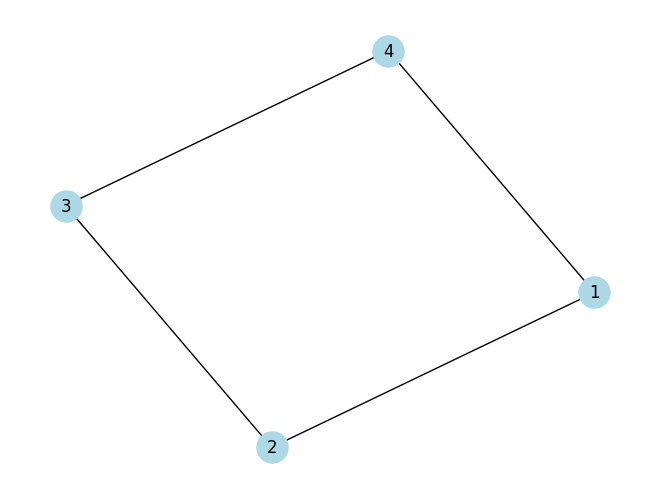

In [5]:
#6.根据以下数据建立可视化无向图：user = [1, 2, 3, 4]，edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图
G = nx.Graph()

# 添加节点
user = [1, 2, 3, 4]
G.add_nodes_from(user)

# 添加边
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G.add_edges_from(edge)

# 绘制图形
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=12)
plt.show()


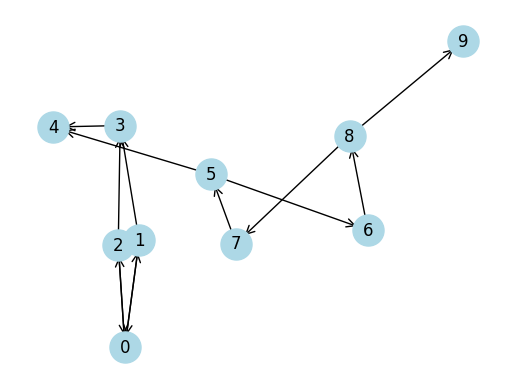

In [11]:
#7.根据以下数据建立可视化有向图：
#users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图
G = nx.DiGraph()

# 添加节点
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

# 添加边
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)

# 绘制有向图
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show()

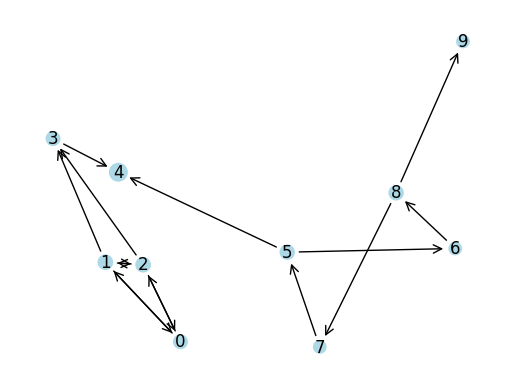

节点 0 的PageRank值为: 0.09499069584253748
节点 1 的PageRank值为: 0.10547659652084884
节点 2 的PageRank值为: 0.10547659652084884
节点 3 的PageRank值为: 0.09499069584253748
节点 4 的PageRank值为: 0.15931683334639937
节点 5 的PageRank值为: 0.1020112395832942
节点 6 的PageRank值为: 0.0785753675867465
节点 7 的PageRank值为: 0.0785753675867465
节点 8 的PageRank值为: 0.1020112395832942
节点 9 的PageRank值为: 0.0785753675867465


In [13]:
#8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图
G = nx.DiGraph()

# 添加节点
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

# 添加边
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)

# 计算PageRank值
damping_factor = 0.85
max_iterations = 100
tolerance = 1e-6
pr = nx.pagerank(G, alpha=damping_factor, max_iter=max_iterations, tol=tolerance)

# 根据PageRank值调整节点大小
node_sizes = [1000 * v for v in pr.values()]

# 绘制有向图
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show()

# 输出每个节点的PageRank值
for node, rank in pr.items():
    print(f"节点 {node} 的PageRank值为: {rank}")